# River Direction Tests

Testing river directions from triangles - directions are represented as angles in degrees, starting from the right (along x-axis, if you want), going counter-clockwise.

We also compare 3D and 2D angles to ensure consistency.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely import Polygon

In [2]:
# test data
test_data = [
    Polygon([(0, 2, 3), (1, 1, 0), (0, 0, 0)]),
    Polygon([(0, 0, -1), (0, 1.1, 0.5), (-1, 1, 0)]),
    Polygon([(0, 0, 1), (-1, 0, 0), (-1, 1, 0)]),
    Polygon([(0, 0, 0.5), (-1, -1, 0), (0, -1, 0)]),
    Polygon([(1, 1, 3), (2, -3, 0), (1, -1, 0)]),
    Polygon([(34.6, 45.2, 365.2), (33.5, 44.6, 362.1), (35.9, 47.9, 364.4)]),
]

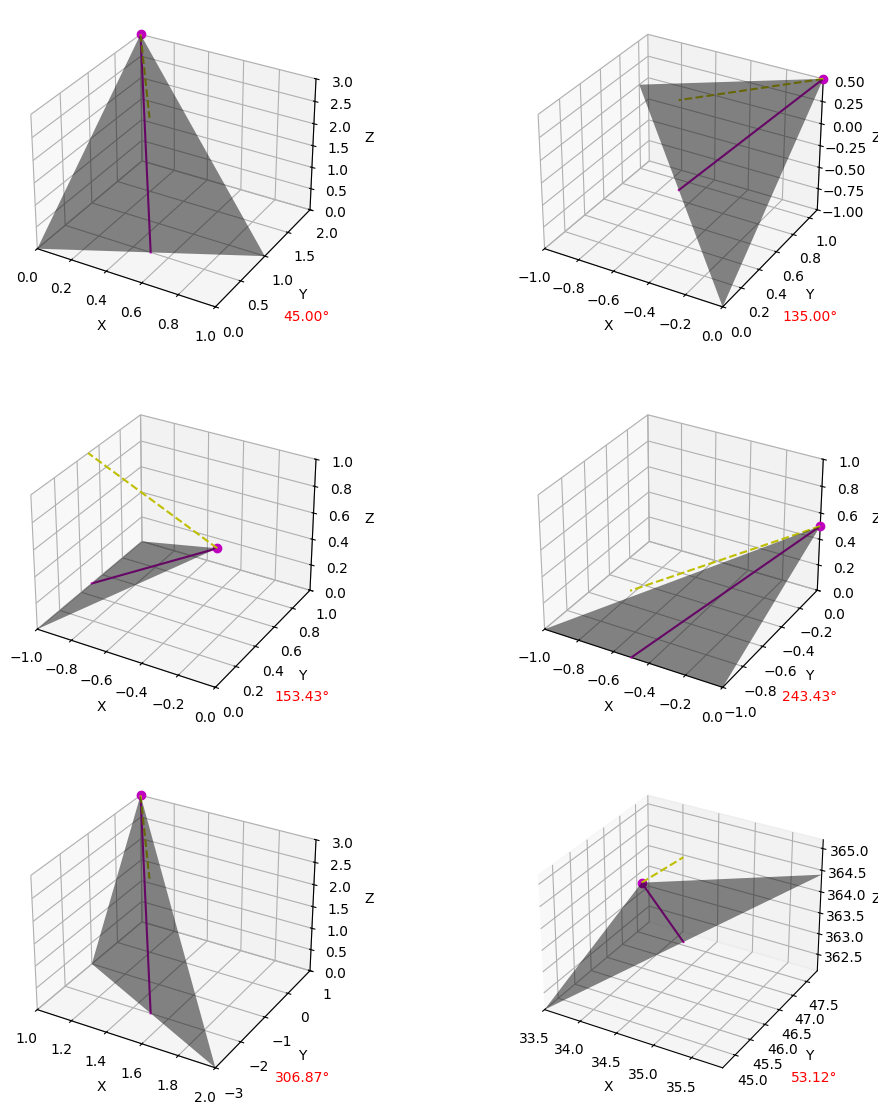

In [3]:
# plot 3D triangles
fig = plt.figure(figsize=(12, 14))

for i, poly in enumerate(test_data):
    coords = np.array(poly.normalize().exterior.coords[:-1]) # get coordinates of the polygon vertices in 3D space - we normalize the polygon coordinate order
    
    # get the highest point(s) in the triangle and create two vectors
    max_h = np.max(coords, axis=0)[2]
    highest = np.where(coords[:, 2] == max_h)[0]  # highest points
    other = np.where(coords[:, 2] != max_h)[0]  # lowest points

    if len(highest) == 2:
        # special case where there are two highest points
        data = np.array([coords[other[0]], coords[highest[0]], coords[highest[1]]])
    else:
        if len(highest) == 1:
            data = np.array([coords[highest[0]], coords[other[0]], coords[other[1]]])
        else:
            # three highest points - flat area?
            # TODO: We might get the lowest angle within the triangle to determine the "highest point" or raise an exception?
            data = coords
    
    # create two vectors starting from the highest point to the other two points
    vector_u = data[1] - data[0]
    vector_v = data[2] - data[0]
    
    # calculate the direction vector in 3D space
    vector_p = (vector_v - vector_u)/2    
    # calculate midpoint which is also the direction vector
    midpoint = data[1] + vector_p

    # since we are on Earth, we can flatten the direction to 2D and calculate angle - this makes calculation quite easy
    theta = np.degrees(np.arctan2(midpoint[1], midpoint[0]))
    if theta < 0:
        theta += 360
    
    ax = fig.add_subplot(len(test_data)//2, 2, i+1, projection='3d')
    ax.set(xlabel='X', ylabel='Y', zlabel='Z')
    mins = np.min(data, axis=0)
    maxs = np.max(data, axis=0)
    for i in range(len(mins)):  # minimum axis
        if maxs[i] - mins[i] < 1.:
            maxs[i] = mins[i] + 1.
    ax.set_xlim([mins[0], maxs[0]])
    ax.set_ylim([mins[1], maxs[1]])
    ax.set_zlim([mins[2], maxs[2]])
    
    # add triangle
    ax.add_collection3d(Poly3DCollection([data], facecolors='#0f0f0f80'))
    # highlight the highest point
    ax.plot(data[0][0], data[0][1], data[0][2], 'mo') # highest point is yellow
        
    # plot line from source to midpoint
    ax.plot([data[0][0], midpoint[0]], [data[0][1], midpoint[1]], [data[0][2], midpoint[2]], 'm-')
    # plot direction from source to midpoint in 2D
    ax.plot([data[0][0], midpoint[0]], [data[0][1], midpoint[1]], [data[0][2], data[0][2]], 'y--')
    
    ax.text2D(0.999, 0.01, f'{theta:.2f}°', horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, color='red')


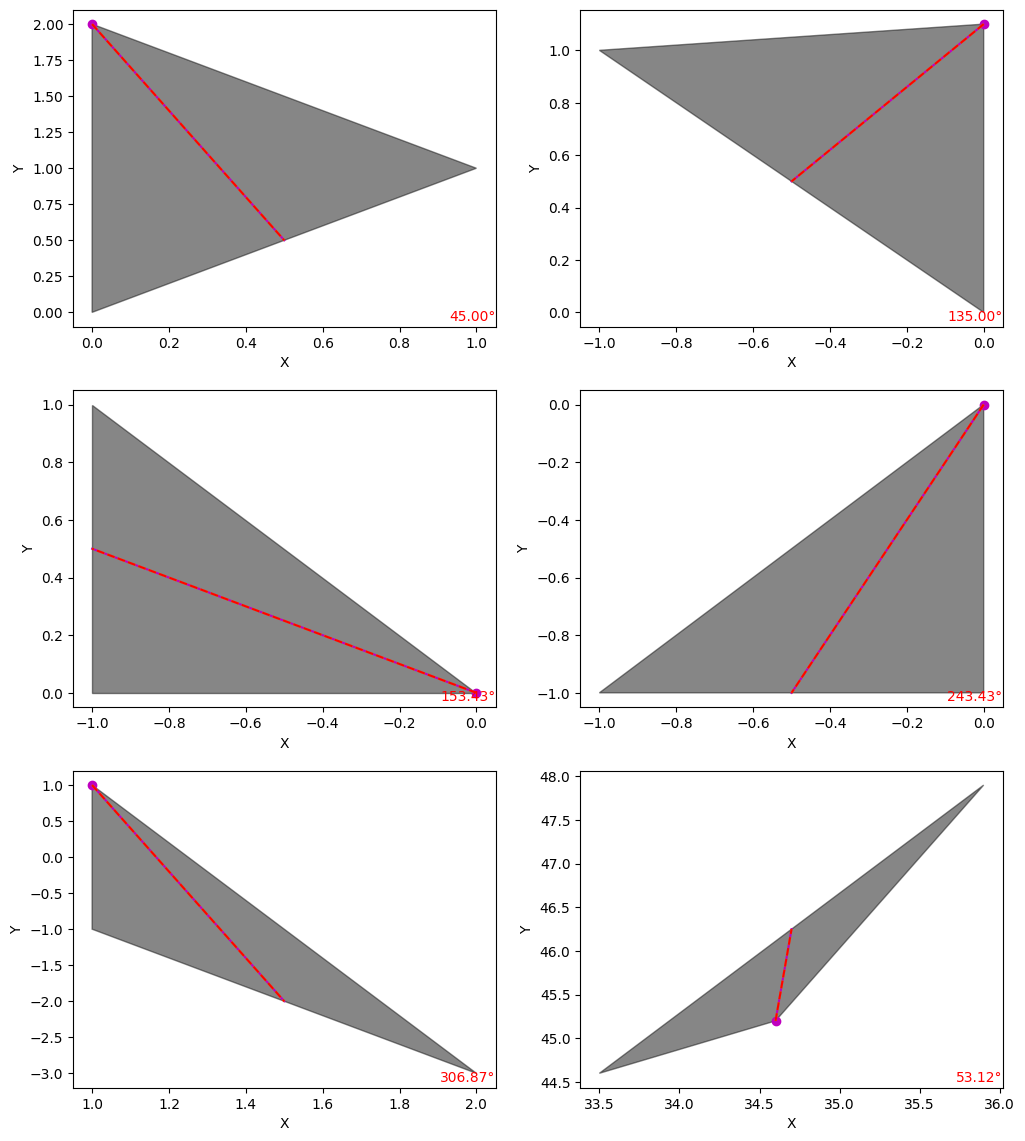

In [6]:
# verify by portraying the direction vectors in 2D
fig = plt.figure(figsize=(12, 14))

for i, poly in enumerate(test_data):
    coords = np.array(poly.normalize().exterior.coords[:-1]) # get coordinates of the polygon vertices in 3D space - we normalize the polygon coordinate order
    
    # get the highest point(s) in the triangle and create two vectors
    max_h = np.max(coords, axis=0)[2]
    highest = np.where(coords[:, 2] == max_h)[0]  # highest points
    other = np.where(coords[:, 2] != max_h)[0]  # lowest points

    if len(highest) == 2:
        # special case where there are two highest points
        data = np.array([coords[other[0]], coords[highest[0]], coords[highest[1]]])
    else:
        if len(highest) == 1:
            data = np.array([coords[highest[0]], coords[other[0]], coords[other[1]]])
        else:
            # three highest points - flat area?
            # TODO: We might get the lowest angle within the triangle to determine the "highest point" or raise an exception?
            data = coords
    
    # create two vectors starting from the highest point to the other two points
    vector_u = data[1] - data[0]
    vector_v = data[2] - data[0]
    
    # calculate the direction vector in 3D space
    vector_p = (vector_v - vector_u)/2    
    # calculate midpoint which is also the direction vector
    midpoint = data[1] + vector_p

    # since we are on Earth, we can flatten the direction to 2D and calculate angle - this makes calculation quite easy
    theta = np.degrees(np.arctan2(midpoint[1], midpoint[0]))
    if theta < 0:
        theta += 360
    
    ax = fig.add_subplot(len(test_data)//2, 2, i+1)
    ax.set(xlabel='X', ylabel='Y')
    
    data_2d = np.delete(data, 2, 1)
    vector_u_2d = np.array([vector_u[0], vector_u[1]])
    vector_v_2d = np.array([vector_v[0], vector_v[1]])
    # to compare, calculate midpoint in 2D
    vector_p_2d = (vector_v_2d - vector_u_2d)/2    
    midpoint_2d = data_2d[1] + vector_p_2d
    
    # add triangle
    ax.add_patch(plt.Polygon([data_2d[0], data_2d[0] + vector_u_2d, data_2d[0] + vector_v_2d], color='#0f0f0f80'))
    
    # highlight the highest point
    ax.plot(data[0][0], data[0][1], 'mo') # highest point is yellow

    # plot line from source to midpoint
    ax.plot([data[0][0], midpoint[0]], [data[0][1], midpoint[1]], 'm-')
    # plot direction from source to midpoint in 2D
    ax.plot([data[0][0], midpoint[0]], [data[0][1], midpoint[1]], 'y--')
    # plot 2d midpoint
    ax.plot([data_2d[0][0], midpoint_2d[0]], [data_2d[0][1], midpoint_2d[1]], 'r--')
    
    ax.text(0.999, 0.01, f'{theta:.2f}°', horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, color='red')


Ok, this clears it - 2D and 3D make no difference for this specific problem.